### 타이타닉 생존/사망

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/program Files (x86)/Graphviz2.38/bin/'


In [50]:
df = pd.read_csv('titanic.csv')    # Siblings(형제자매)/Spouses(배우자) Aboard 
df.shape

(887, 8)

In [51]:
 df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [52]:
df.Name.nunique()  # Name이 겹치는 사람이 없음. -> 인덱스 사용하기 좋을 듯

887

In [53]:
df = df.set_index('Name')

In [54]:
df.head(3)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250


In [55]:
df.columns=['Survived', 'Pclass', 'Sex', 'Age', 'Siblings','Parents', 'Fare']  # 컬럼명 단축

In [56]:
df.head(3)

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250


In [57]:
df.Survived.mean() # 생존률 (평균) 38% 생존함

0.3855693348365276

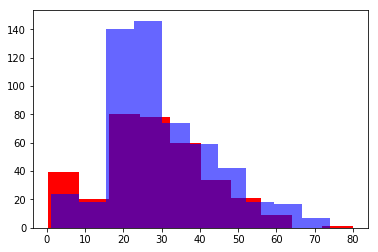

In [58]:
p = plt.hist(df[df['Survived']==1]['Age'].values, color = 'red' )
p = plt.hist(df[df['Survived']==0]['Age'].values, color = 'blue', alpha=0.6)

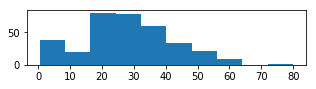

In [59]:
plt.figure(figsize=(5,1))
p = plt.hist(df[df['Survived']==1]['Age'].values)  # 나이별 생존률

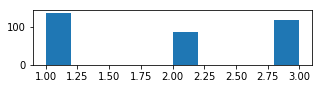

In [60]:
plt.figure(figsize=(5,1))
p = plt.hist(df[df['Survived']==1]['Pclass'].values)  # 클래스별 생존률

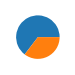

In [61]:
plt.figure(figsize=(5,1))
p = plt.pie(df['Sex'].value_counts())  # 탑승한 성별비율

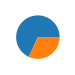

In [62]:
plt.figure(figsize=(5,1))
p = plt.pie(df[df['Survived']==1]['Sex'].value_counts())  #  성별 생존률

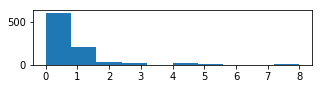

In [63]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)  #  

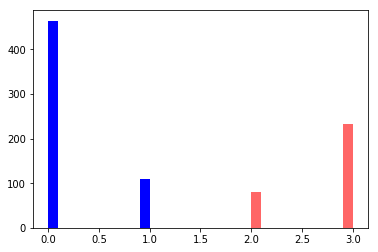

In [64]:
p = plt.hist(df[df['Sex']=='male']['Survived'].values, color = 'blue' )
p = plt.hist(df[df['Sex']=='female']['Survived'].values+2, color = 'red', alpha=0.6)

In [65]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [66]:
df['Pclass'] = df['Pclass'].astype('object')

In [67]:
data = pd.get_dummies(df)

In [47]:
data.head(3)

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0


In [79]:
X = data.drop(columns='Survived')
y = data['Survived']

In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [81]:
model.score(X,y) # max_depth가 없을 때는 98%, max_depth=4일 때는 84%

0.8489289740698985

In [82]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die', 'Survive'],
               feature_names=X.columns, impurity=False, filled=True) 

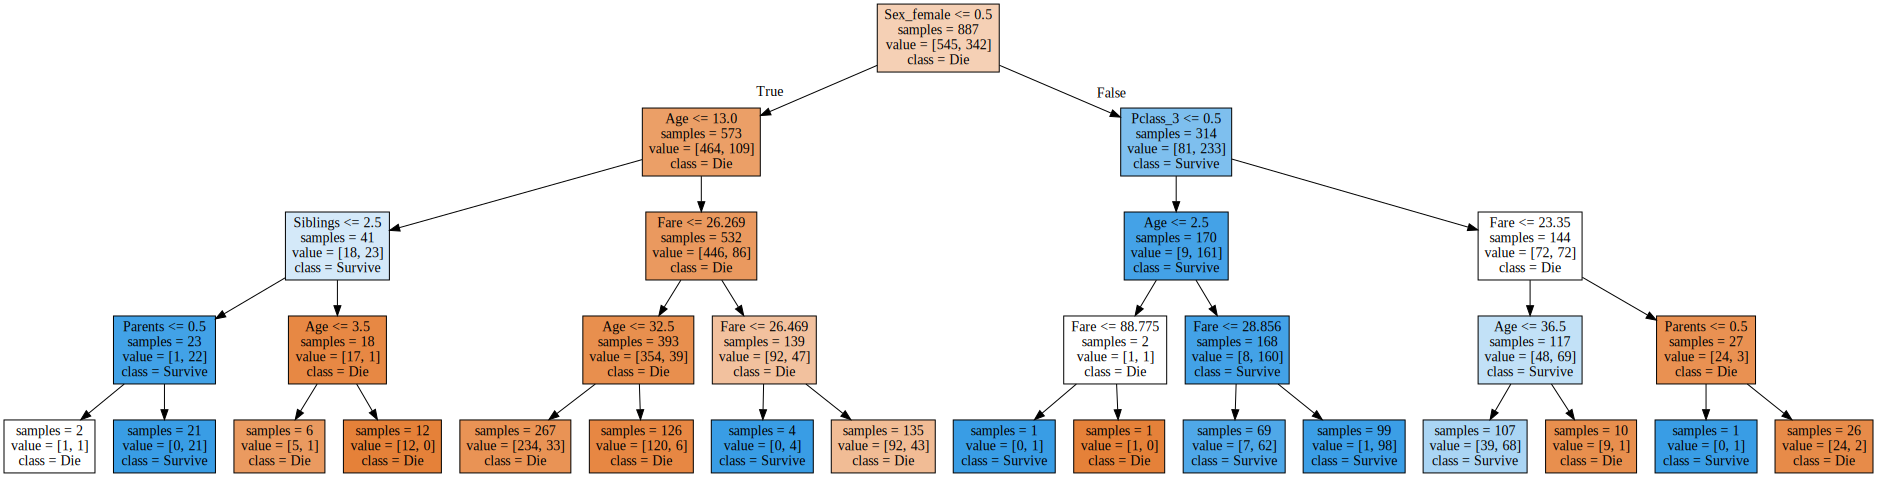

In [83]:
with open('titanic.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)    
display(g)